In [ ]:
# Observation 1:

# It does indeed get hotter overall as you move towards the equater. 


# Observation 2:

# Temperature trends in the southern hemisphere appear to be milder. 
# Although we are at the turn of seasons (i.e. Autumn and Spring), the temperature trends in the
# northern hemisphere are far more pronounced. 


# Observation 3:

# Humidity seems to increase as you move away from the equator. 
# Potentially this could contradict how "hot" it feels, but temperature changes would offset this. 


# Observation 4:

# It seems to be sunnier closer to the equator, and cloudiness rises towards the poles. 

In [270]:
from config import gkey
from config import weatherkey
from citipy import citipy
import numpy as np
import pandas as pd
import requests
import json
from pprint import pprint
from matplotlib import pyplot as plt
from scipy import stats
import os

In [271]:
# create dataframe 
City_df = pd.DataFrame()
header_list = ['City','Country','Lattitude','Longitude','Temperature C','Temperature F','Humidity %','Cloudiness %','Wind Speed (mph)']
City_df = City_df.reindex(columns = header_list)
City_df['City']= City_df['City'].astype(str)
City_df['Country']= City_df['Country'].astype(str)


In [272]:
loopcount = 0
MaxCities = 500

savefolder = "Output/"

# start loop
while loopcount < MaxCities:
    rowlist = []
    # set random lats and longs
    rand_lat = round(np.random.uniform(-90, 90),4)
    rand_long = round(np.random.uniform(-180, 180),4)

    # get city name and counry 
    cityname = citipy.nearest_city(rand_lat,rand_long).city_name.title()
    citycountry = citipy.nearest_city(rand_lat,rand_long).country_code.upper()

    # test if city name already in list, and restart if so
    if cityname in City_df['City'].values:
        print(f'{cityname} is a Duplicate City, Skipping.')
        continue
        
    # generate url and hit API 
    full_url = base_url + cityname + comma + citycountry + '&appid=' + weatherkey
    response = requests.get(full_url) 
    parsed_response = response.json()
    
    # attempt to load data into DF, if city was found and values can be parsed 
    try:
        City_df.at[loopcount, 'City']  = cityname    
        City_df.at[loopcount, 'Country'] = citycountry
        City_df.at[loopcount, 'Temperature C'] = (parsed_response["main"]["temp_max"] - 273)
        City_df.at[loopcount, 'Temperature F'] = (parsed_response["main"]["temp_max"] * 1.8 - 457.6)
        City_df.at[loopcount, 'Lattitude'] = parsed_response["coord"]["lat"]
        City_df.at[loopcount, 'Longitude'] = parsed_response["coord"]["lon"]
        City_df.at[loopcount, 'Humidity %'] = parsed_response["main"]["humidity"]
        City_df.at[loopcount, 'Cloudiness %'] = parsed_response["clouds"]["all"]
        City_df.at[loopcount, 'Wind Speed (mph)'] = (parsed_response["wind"]["speed"] * 2.24)
        print('City found: ' + cityname + ", " + citycountry + ", #" + loopcount)
        loopcount = loopcount + 1
    except:
        print('City ' + cityname + ' not found in API! Skipping.')

# Save and output dataframe to screen
City_df.to_csv(savefolder + 'City Weather Data.csv')  
City_df.head(50)

City found: Besancon, FR
City found: Punta Arenas, CL
City found: Roebourne, AU
City Mataura not found in API! Skipping.
City found: Saldanha, ZA
City Yeehaw Junction not found in API! Skipping.
City found: Rikitea, PF
City Khani not found in API! Skipping.
City found: Souillac, MU
City found: Jamestown, SH
City found: Aklavik, CA
City found: Port Lincoln, AU
City found: Hobart, AU
City found: Ribeira Grande, PT
City found: Rio Gallegos, AR
City found: Kaitangata, NZ
City found: North Myrtle Beach, US
City found: Hasaki, JP
City found: Cidreira, BR
City found: Fairbanks, US
Jamestown is a Duplicate City, Skipping.
City found: Ushuaia, AR
City found: Tasiilaq, GL
Rikitea is a Duplicate City, Skipping.
Ushuaia is a Duplicate City, Skipping.
City found: Naze, JP
City found: Kodiak, US
City found: Prestea, GH
Ushuaia is a Duplicate City, Skipping.
City found: Kuching, MY
City found: Aksu, KZ
City found: Salalah, OM
City found: Iquitos, PE
Rikitea is a Duplicate City, Skipping.
City Sur not

City found: Kapaa, US
Ushuaia is a Duplicate City, Skipping.
City Barentsburg not found in API! Skipping.
City Belushya Guba not found in API! Skipping.
City found: Acarau, BR
City found: Yar-Sale, RU
City Amderma not found in API! Skipping.
City found: Songjianghe, CN
City found: Limanowa, PL
City found: Saskylakh, RU
City found: Huambo, AO
Bluff is a Duplicate City, Skipping.
City found: Bundaberg, AU
City Amderma not found in API! Skipping.
Hermanus is a Duplicate City, Skipping.
City found: Samarai, PG
Vaini is a Duplicate City, Skipping.
Hermanus is a Duplicate City, Skipping.
City found: Opuwo, NA
City found: Cockburn Town, TC
City Codrington not found in API! Skipping.
Bredasdorp is a Duplicate City, Skipping.
City found: Arraial Do Cabo, BR
City found: Adrar, DZ
City found: Road Town, VG
Port Alfred is a Duplicate City, Skipping.
City found: Taitung, TW
Hobart is a Duplicate City, Skipping.
Butaritari is a Duplicate City, Skipping.
Punta Arenas is a Duplicate City, Skipping.
Us

City found: Aswan, EG
Vaini is a Duplicate City, Skipping.
City found: Vardo, NO
Torbay is a Duplicate City, Skipping.
City Amderma not found in API! Skipping.
City found: Moerai, PF
Puerto Ayora is a Duplicate City, Skipping.
City Rawannawi not found in API! Skipping.
City found: Yumen, CN
City Mataura not found in API! Skipping.
City found: Cayenne, GF
Vaini is a Duplicate City, Skipping.
Kapaa is a Duplicate City, Skipping.
City Babanusah not found in API! Skipping.
Saint George is a Duplicate City, Skipping.
East London is a Duplicate City, Skipping.
Hobart is a Duplicate City, Skipping.
City Illoqqortoormiut not found in API! Skipping.
Tuktoyaktuk is a Duplicate City, Skipping.
City found: Ayan, RU
Shingu is a Duplicate City, Skipping.
Vaini is a Duplicate City, Skipping.
City found: Willowmore, ZA
Ushuaia is a Duplicate City, Skipping.
Bredasdorp is a Duplicate City, Skipping.
Albany is a Duplicate City, Skipping.
Butaritari is a Duplicate City, Skipping.
City found: Faanui, PF
H

City Barentsburg not found in API! Skipping.
City found: Mackenzie, CA
City found: Ust-Omchug, RU
City found: Ostrovnoy, RU
City Illoqqortoormiut not found in API! Skipping.
Dikson is a Duplicate City, Skipping.
Barrow is a Duplicate City, Skipping.
City found: Urumqi, CN
City Mataura not found in API! Skipping.
City found: Biltine, TD
Rikitea is a Duplicate City, Skipping.
Provideniya is a Duplicate City, Skipping.
Punta Arenas is a Duplicate City, Skipping.
Barcelos is a Duplicate City, Skipping.
City found: Troina, IT
Lazaro Cardenas is a Duplicate City, Skipping.
City found: Berlevag, NO
Kapaa is a Duplicate City, Skipping.
Severo-Kurilsk is a Duplicate City, Skipping.
City Grand River South East not found in API! Skipping.
City Airai not found in API! Skipping.
City found: Jyvaskyla, FI
Rikitea is a Duplicate City, Skipping.
Hobart is a Duplicate City, Skipping.
City found: Port Blair, IN
City found: Christchurch, NZ
Tiksi is a Duplicate City, Skipping.
Dingle is a Duplicate City,

City found: Dicamay, PH
Jamestown is a Duplicate City, Skipping.
Port Alfred is a Duplicate City, Skipping.
Tiksi is a Duplicate City, Skipping.
Kapaa is a Duplicate City, Skipping.
Albany is a Duplicate City, Skipping.
City Taolanaro not found in API! Skipping.
City found: Atar, MR
Qaanaaq is a Duplicate City, Skipping.
Buala is a Duplicate City, Skipping.
City Grand River South East not found in API! Skipping.
Georgetown is a Duplicate City, Skipping.
City Mataura not found in API! Skipping.
Qaqortoq is a Duplicate City, Skipping.
Hobart is a Duplicate City, Skipping.
Provideniya is a Duplicate City, Skipping.
Hermanus is a Duplicate City, Skipping.
Busselton is a Duplicate City, Skipping.
City found: Buraydah, SA
City found: Pinotepa Nacional, MX
Hofn is a Duplicate City, Skipping.
Ushuaia is a Duplicate City, Skipping.
City found: Kupang, ID
City found: Guozhen, CN
City found: Rabak, SD
City Saleaula not found in API! Skipping.
Port Alfred is a Duplicate City, Skipping.
City found:

City Mataura not found in API! Skipping.
Carnarvon is a Duplicate City, Skipping.
City Mys Shmidta not found in API! Skipping.
City found: Funehiki, JP
City found: Eureka, US
City found: Guiglo, CI
City found: Ponta Delgada, PT
City found: Erenhot, CN
City found: Jalu, LY
Punta Arenas is a Duplicate City, Skipping.
Ambilobe is a Duplicate City, Skipping.
Albany is a Duplicate City, Skipping.
City found: Veinticinco De Mayo, AR
Puerto Ayora is a Duplicate City, Skipping.
City found: Monrovia, LR
City Eldikan not found in API! Skipping.
Rikitea is a Duplicate City, Skipping.
City found: Plettenberg Bay, ZA
City found: Estevan, CA
Hobart is a Duplicate City, Skipping.
Jamestown is a Duplicate City, Skipping.
Rikitea is a Duplicate City, Skipping.
Albany is a Duplicate City, Skipping.
City found: Coruripe, BR
City found: Sulangan, PH
City Mataura not found in API! Skipping.
Tuktoyaktuk is a Duplicate City, Skipping.
Albany is a Duplicate City, Skipping.
City Illoqqortoormiut not found in A

,City,Country,Lattitude,Longitude,Temperature C,Temperature F,Humidity %,Cloudiness %,Wind Speed (mph)
0,Besancon,FR,47.2488,6.0182,2.37,38.066,39.0,0.0,3.0016
1,Punta Arenas,CL,-53.1500,-70.9167,4.15,41.270,70.0,40.0,8.0640
2,Roebourne,AU,-20.7833,117.1333,29.74,87.332,43.0,49.0,21.5936
3,Saldanha,ZA,-33.0117,17.9442,23.15,75.470,46.0,1.0,18.4352
4,Rikitea,PF,-23.1203,-134.9692,26.59,81.662,77.0,84.0,9.5424
5,Souillac,MU,-20.5167,57.5167,29.15,86.270,74.0,75.0,10.3712
6,Jamestown,SH,-15.9387,-5.7168,21.17,71.906,73.0,23.0,20.1376
7,Aklavik,CA,68.2191,-135.0107,-24.85,-10.930,77.0,13.0,2.3072
8,Port Lincoln,AU,-34.7333,135.8667,21.97,73.346,63.0,0.0,14.2016
9,Hobart,AU,-42.8794,147.3294,17.15,64.670,67.0,20.0,13.8208


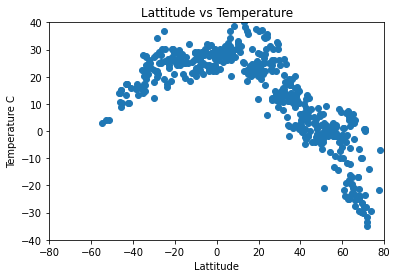

In [273]:
fig1 = plt.scatter(City_df['Lattitude'],City_df['Temperature C'])
plt.title('Lattitude vs Temperature')
plt.xlabel('Lattitude')
plt.xlim(-80, 80)
plt.ylabel('Temperature C')
plt.ylim(-40,40)
plt.show()

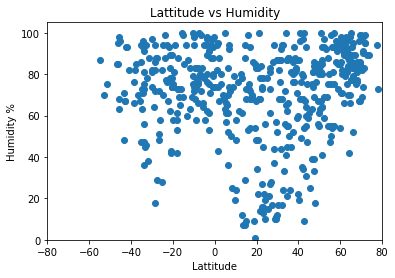

In [274]:
fig2 = plt.scatter(City_df['Lattitude'],City_df['Humidity %'])
plt.title('Lattitude vs Humidity')
plt.xlabel('Lattitude')
plt.xlim(-80, 80)
plt.ylabel('Humidity %')
plt.ylim(0,105)
plt.show()

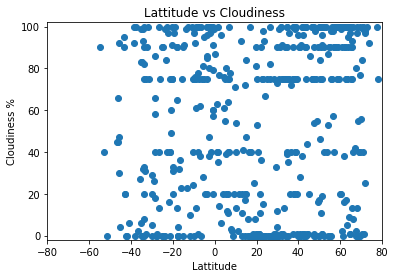

In [275]:
fig3 = plt.scatter(City_df['Lattitude'],City_df['Cloudiness %'])
plt.title('Lattitude vs Cloudiness')
plt.xlabel('Lattitude')
plt.xlim(-80, 80)
plt.ylabel('Cloudiness %')
plt.ylim(-2,102)
plt.show()

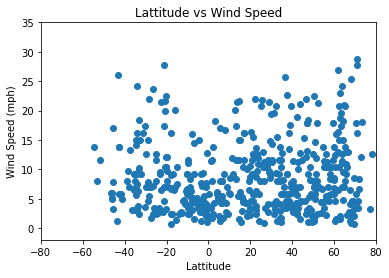

In [276]:
fig4 = plt.scatter(City_df['Lattitude'],City_df['Wind Speed (mph)'])
plt.title('Lattitude vs Wind Speed')
plt.xlabel('Lattitude')
plt.xlim(-80, 80)
plt.ylabel('Wind Speed (mph)')
plt.ylim(-2,35)
plt.show()

In [277]:
# Hemispheric Analysis Dataframes 

NorthernHemisphere_df = City_df.loc[(City_df['Lattitude'] > 0)]
SouthernHemisphere_df = City_df.loc[(City_df['Lattitude'] < 0)]



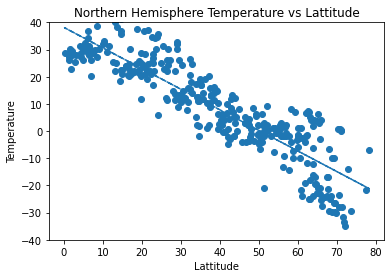

In [278]:
graph1 = plt.scatter(NorthernHemisphere_df['Lattitude'],NorthernHemisphere_df['Temperature C'])
plt.xlabel('Lattitude')
plt.ylabel('Temperature')
plt.title('Northern Hemisphere Temperature vs Lattitude')
plt.ylim(-40, 40)
g1_slope, g1_int, g1_r, g1_p, g1_std_err = stats.linregress(NorthernHemisphere_df['Lattitude'],NorthernHemisphere_df['Temperature C'])
g1_fit = g1_slope * NorthernHemisphere_df['Lattitude'] + g1_int
plt.plot(NorthernHemisphere_df['Lattitude'],g1_fit,"--")

plt.savefig(savefolder + 'Northern Hemisphere Temperature vs Lattitude.jpg', dpi = 300)

plt.show()

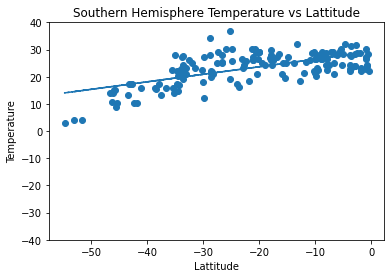

In [279]:
graph2 = plt.scatter(SouthernHemisphere_df['Lattitude'],SouthernHemisphere_df['Temperature C'])
plt.xlabel('Lattitude')
plt.ylabel('Temperature')
plt.ylim(-40, 40)
plt.title('Southern Hemisphere Temperature vs Lattitude')
g2_slope, g2_int, g2_r, g2_p, g2_std_err = stats.linregress(SouthernHemisphere_df['Lattitude'],SouthernHemisphere_df['Temperature C'])
g2_fit = g2_slope * SouthernHemisphere_df['Lattitude'] + g2_int
plt.plot(SouthernHemisphere_df['Lattitude'],g2_fit,"--")

plt.savefig(savefolder + 'Southern Hemisphere Temperature vs Lattitude.jpg', dpi = 300)

plt.show()

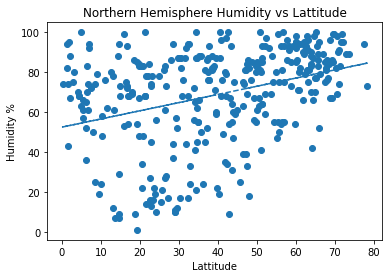

In [280]:
graph3 = plt.scatter(NorthernHemisphere_df['Lattitude'],NorthernHemisphere_df['Humidity %'])
plt.xlabel('Lattitude')
plt.ylabel('Humidity %')
plt.title('Northern Hemisphere Humidity vs Lattitude')
g3_slope, g3_int, g3_r, g3_p, g3_std_err = stats.linregress(NorthernHemisphere_df['Lattitude'],NorthernHemisphere_df['Humidity %'])
g3_fit = g3_slope * NorthernHemisphere_df['Lattitude'] + g3_int
plt.plot(NorthernHemisphere_df['Lattitude'],g3_fit,"--")

plt.savefig(savefolder + 'Northern Hemisphere Humidity vs Lattitude.jpg', dpi = 300)

plt.show()

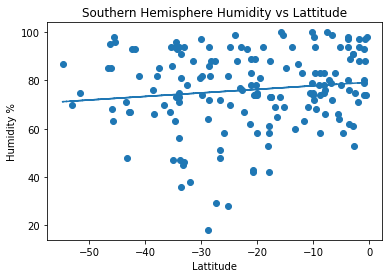

In [281]:
graph4 = plt.scatter(SouthernHemisphere_df['Lattitude'],SouthernHemisphere_df['Humidity %'])
plt.xlabel('Lattitude')
plt.ylabel('Humidity %')
plt.title('Southern Hemisphere Humidity vs Lattitude')
g4_slope, g4_int, g4_r, g4_p, g4_std_err = stats.linregress(SouthernHemisphere_df['Lattitude'],SouthernHemisphere_df['Humidity %'])
g4_fit = g4_slope * SouthernHemisphere_df['Lattitude'] + g4_int
plt.plot(SouthernHemisphere_df['Lattitude'],g4_fit,"--")

plt.savefig(savefolder + 'Southern Hemisphere Humidity vs Lattitude.jpg', dpi = 300)

plt.show()

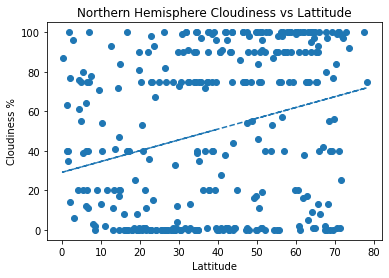

In [282]:
graph5 = plt.scatter(NorthernHemisphere_df['Lattitude'],NorthernHemisphere_df['Cloudiness %'])
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness %')
plt.title('Northern Hemisphere Cloudiness vs Lattitude')
g5_slope, g5_int, g5_r, g5_p, g5_std_err = stats.linregress(NorthernHemisphere_df['Lattitude'],NorthernHemisphere_df['Cloudiness %'])
g5_fit = g5_slope * NorthernHemisphere_df['Lattitude'] + g5_int
plt.plot(NorthernHemisphere_df['Lattitude'],g5_fit,"--")

plt.savefig(savefolder + 'Northern Hemisphere Cloudiness vs Lattitude.jpg', dpi = 300)

plt.show()

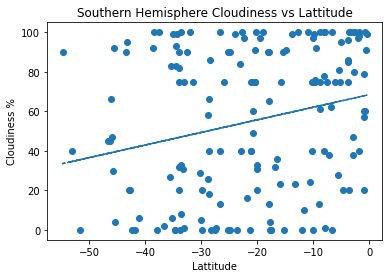

In [283]:
graph6 = plt.scatter(SouthernHemisphere_df['Lattitude'],SouthernHemisphere_df['Cloudiness %'])
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness %')
plt.title('Southern Hemisphere Cloudiness vs Lattitude')
g6_slope, g6_int, g6_r, g6_p, g6_std_err = stats.linregress(SouthernHemisphere_df['Lattitude'],SouthernHemisphere_df['Cloudiness %'])
g6_fit = g6_slope * SouthernHemisphere_df['Lattitude'] + g6_int
plt.plot(SouthernHemisphere_df['Lattitude'],g6_fit,"--")

plt.savefig(savefolder + 'Southern Hemisphere Cloudiness vs Lattitude.jpg', dpi = 300)

plt.show()

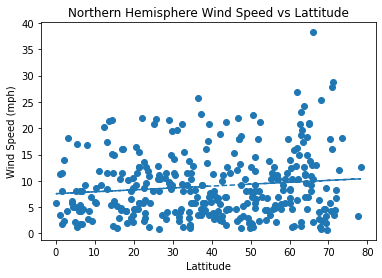

In [284]:
graph7 = plt.scatter(NorthernHemisphere_df['Lattitude'],NorthernHemisphere_df['Wind Speed (mph)'])
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere Wind Speed vs Lattitude')
g7_slope, g7_int, g7_r, g7_p, g7_std_err = stats.linregress(NorthernHemisphere_df['Lattitude'],NorthernHemisphere_df['Wind Speed (mph)'])
g7_fit = g7_slope * NorthernHemisphere_df['Lattitude'] + g7_int
plt.plot(NorthernHemisphere_df['Lattitude'],g7_fit,"--")

plt.savefig(savefolder + 'Northern Hemisphere Wind Speed vs Lattitude.jpg', dpi = 300)

plt.show()

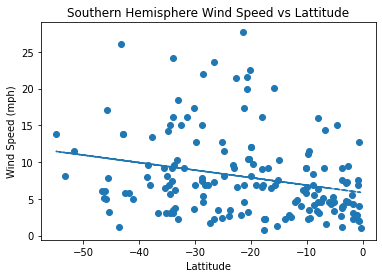

In [285]:
graph8 = plt.scatter(SouthernHemisphere_df['Lattitude'],SouthernHemisphere_df['Wind Speed (mph)'])
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere Wind Speed vs Lattitude')
g8_slope, g8_int, g8_r, g8_p, g8_std_err = stats.linregress(SouthernHemisphere_df['Lattitude'],SouthernHemisphere_df['Wind Speed (mph)'])
g8_fit = g8_slope * SouthernHemisphere_df['Lattitude'] + g8_int
plt.plot(SouthernHemisphere_df['Lattitude'],g8_fit,"--")

plt.savefig(savefolder + 'Southern Hemisphere Wind Speed vs Lattitude.jpg', dpi = 300)

plt.show()